# 07MIAR - Redes Neuronales y Deep Learning: Dog Breed Identification


## Proyecto realizado por:

1.   **Miguel Houghton López**
2.   **Carlos de la Fuente Torres**




## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**. 
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

# **CARGA DEL CONJUNTO DE DATOS**

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

In [ ]:
!kaggle competitions download -c dog-breed-identification

 99% 682M/691M [00:05<00:00, 116MB/s]
100% 691M/691M [00:05<00:00, 140MB/s]


In [ ]:
!mkdir my_dataset

In [ ]:
!unzip dog-breed-identification.zip -d my_dataset

# **INSPECCIÓN DEL CONJUNTO DE DATOS**

### Imports

In [ ]:
import csv
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.applications import mobilenet_v2, efficientnet_v2, imagenet_utils
from keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet_v2
from keras.applications.inception_v3 import preprocess_input as preprocess_input_inception_v3

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Conv2D, Activation, Dropout, Flatten, Dense, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras import Model
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
# Conectamos con nuestro Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

In [ ]:
folder_train = './my_dataset/train/'
folder_test = './my_dataset/test/'
csv_labels = './my_dataset/labels.csv'
sample_submission = './my_dataset/sample_submission.csv'

In [ ]:
samples_test = os.listdir(folder_test)
samples_train = os.listdir(folder_train)
print("Total muestras test : ", len(samples_test))
print("Total muestras train: ", len(samples_train))

Total muestras test :  10357
Total muestras train:  10222


### Número de muestras por clase
Vamos a extraer gráficamente el número total de muestras que tenemos por clase para conocer mejor nuestro conjunto de datos.

Text(0, 0.5, 'CLASES DE PERROS')

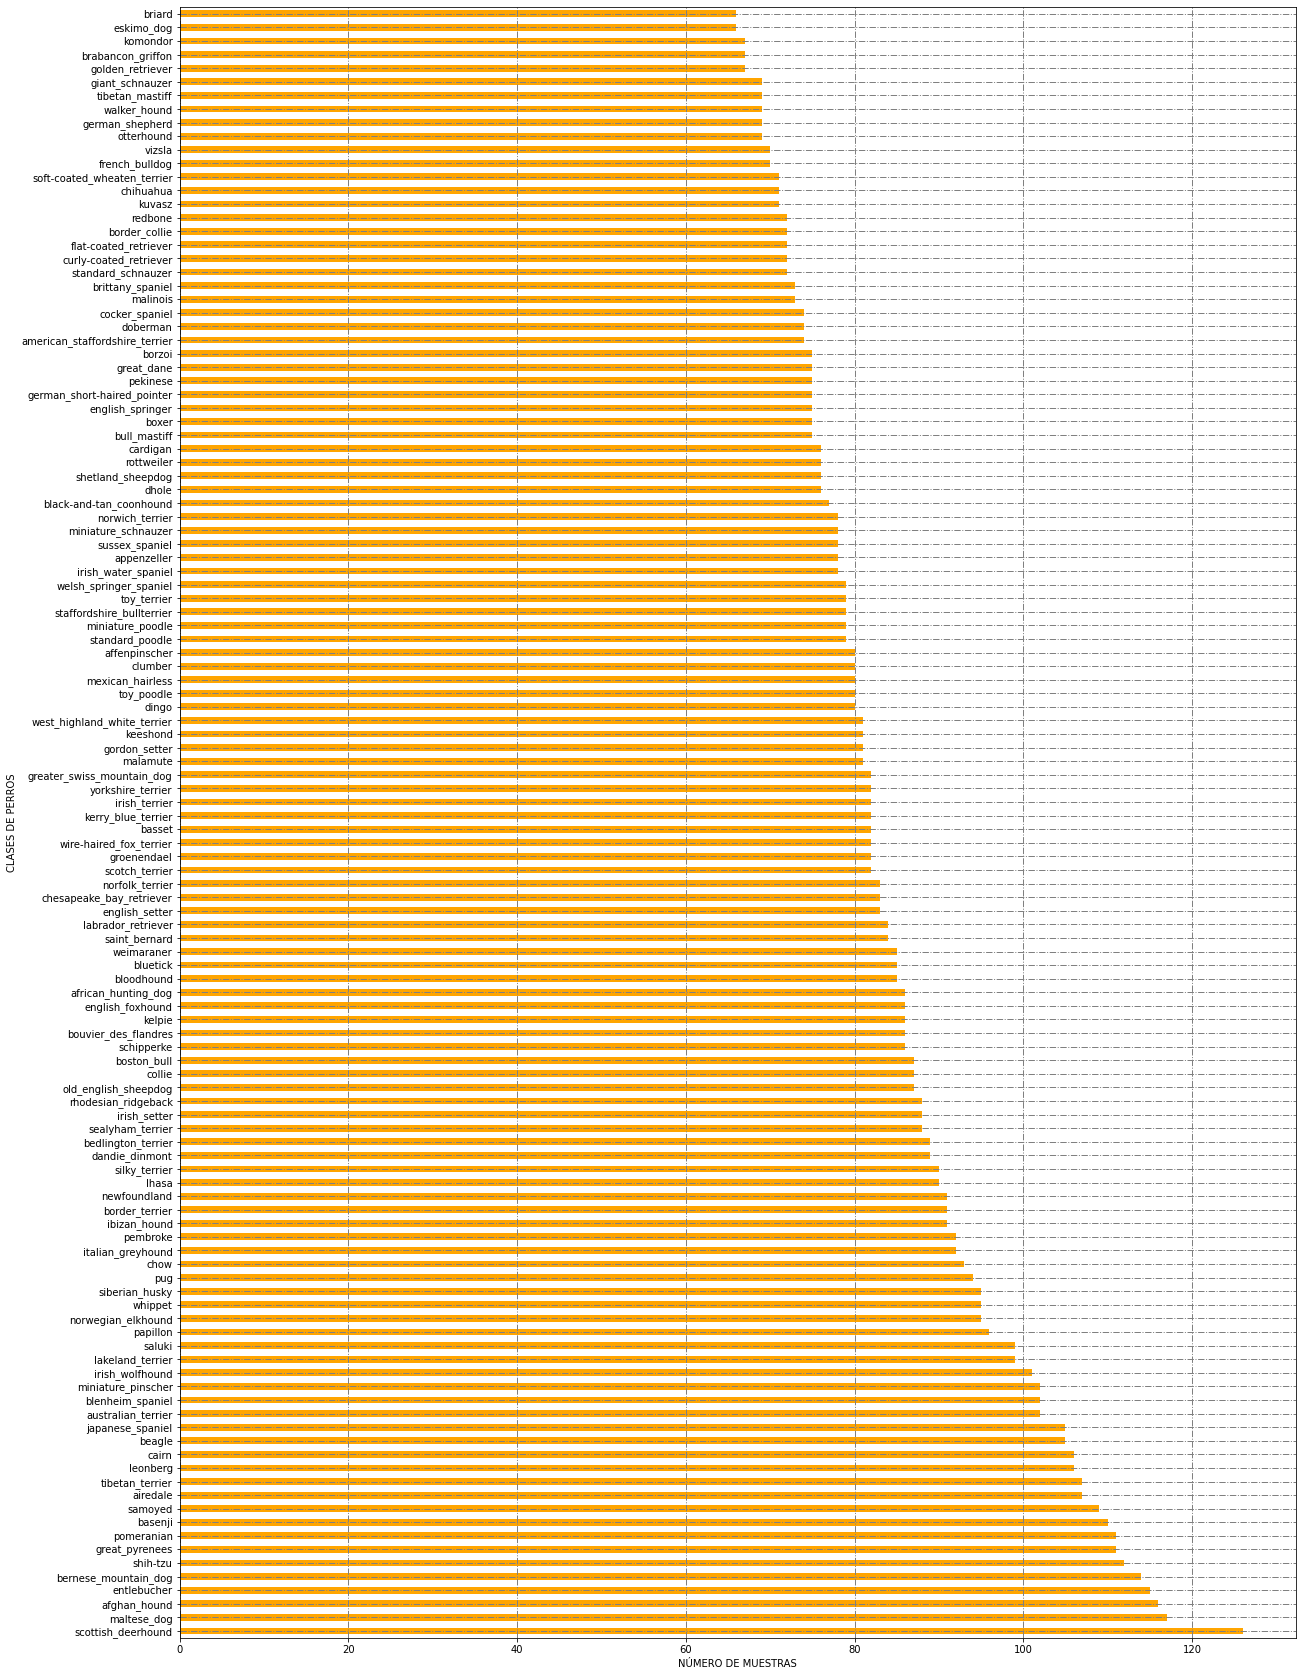

In [ ]:
labels = pd.read_csv(csv_labels)
labels['breed'].value_counts().plot(kind='barh', color='orange', figsize=(20,30))
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.xlabel("NÚMERO DE MUESTRAS")
plt.ylabel("CLASES DE PERROS")

Tenemos un total de **120 tipos de razas diferentes** en nuestro conjunto de entrenamiento. De un total de **10222 muestras**.

Si las muestras estuviesen equilibradas tendríamos 85 muestras por clase pero como podemos observar las muestras están **desbalanceadas** teniendo razas que superan las 120 muestras y razas que no llegan ni a 70 muestras.

### Visualización de muestras
Tras explorar nuestro conjunto de datos gráficamente conviene también explorar el tipo de muestras que tenemos. Para ello, vamos a **plotear** un conjunto aleatoria de **3x3 imágenes con su respectivo label** (raza) y validar que tanto el etiquetado como las imágenes están correctamente cargadas.

In [ ]:
filenames = [folder_train + name_label + '.jpg' for name_label in labels['id']]
print(filenames[321])

./my_dataset/train/07c7389196b5dde668d740089f9ebc22.jpg


In [ ]:
#obtenemos los labels en one hot encoding
y = np.unique(labels['breed'])
y = { key : value for key,value in zip(y,range(len(y)))}
y = np.array([y[i] for i in labels['breed']])
y = to_categorical(y, dtype ="uint8")

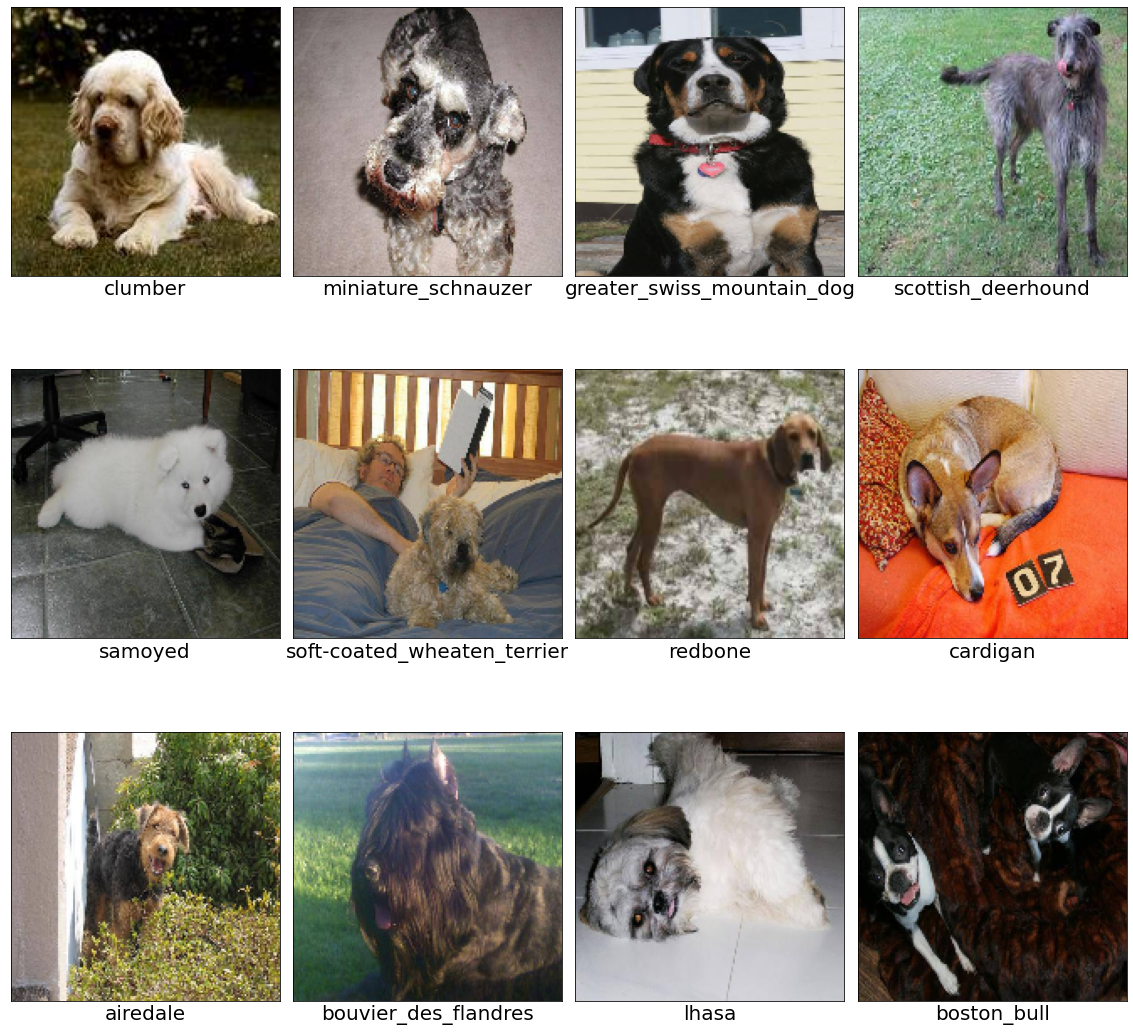

In [ ]:
from random import randint
fig, axes = plt.subplots(3, 4,figsize=(20,20),sharex=True)
fig.subplots_adjust(hspace=0.0, wspace=0.05)

for i, ax in enumerate(axes.flat):
    random_index = randint(0,len(filenames))

    label = labels['breed'][random_index]
    filename = filenames[random_index]

    image = cv2.imread(filename, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (160,160))
    
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))    
    xlabel = label

    ax.set_xlabel(xlabel)
    ax.xaxis.label.set_size(20)
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

### Split de datos
Antes de comenzar, y dado que este dataset es de una competición de kaggle, solo podremos utilizar el conjunto de train. 

Como primera partición (al no tener muchas muestras por clase) hacemos un split del conjutno dejando:


*   95% muestras Train
*   **5% muestras Test**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(filenames, y, test_size=0.05, random_state=42)

In [ ]:
print(len(X_train), 'muestras en train')
print(len(X_test), 'muestras en test')

9199 muestras en train
1023 muestras en test


### Preprocesamiento de datos
Tanto para la Estrategia 1 (modelo desde 0) como para la Estrategia 2 (modelo preentrenado) debemos preprocesar los datos de la mejor manera posible para poder facilitar la convergencia a la red. 
Se ha realizado una función de carga de datos con diferentes preprocesamientos:


*   **Normalización** al rango [0,1]
*   Preprocesamiento de **Imagenet**
*   Preprocesamiento **MobileNetV2**
*   Preprocesamiento **InceptionV3**






In [ ]:
def resize_image(img, shape):
    img = cv2.resize(img, shape, interpolation = cv2.INTER_AREA)
    return img

In [ ]:
def preprocess_images(data, type_t='imagenet'):
  if type_t == 'imagenet':
    data = imagenet_utils.preprocess_input(data)
  elif type_t == 'mobilenet':
    data = preprocess_input_mobilenet_v2(data)
  elif type_t == 'efficientnet':
    data = preprocess_input_efficientnet_v2(data)
  return data   

In [ ]:
def load_data(filenames, labels, shape=(224,224), preprocess_type='imagenet', normalize=True):
  
  data = np.empty((len(filenames), shape[0], shape[1], 3), dtype=np.float32)
  samples = []
  for count, current_file in enumerate(filenames):
    img = cv2.imread(current_file, cv2.COLOR_RGB2BGR)
    img = resize_image(img, shape)
    if normalize:
      img = img/255.

    data[count, :, :] = img

  data = preprocess_images(data, preprocess_type)
  return data, labels

In [ ]:
X_train, y_train = load_data(X_train, y_train, shape=(160,160), preprocess_type='None', normalize=True)
print(X_train.shape)
print(y_train.shape)

(9199, 160, 160, 3)
(9199, 120)


In [ ]:
X_test, y_test = load_data(X_test, y_test, (160,160), preprocess_type='None', normalize=True)
print(X_test.shape)
print(y_test.shape)

(1023, 160, 160, 3)
(1023, 120)


### Generadores de datos
Creamos una serie de generadores de datos que utilizaremos, como su propio nombre indica, para **generalizar mejor las características** de las imagenes que tenemos. Es un método muy útil **cuando no tenemos muchas muestras**.

In [ ]:
#Contenedor DataGenerator
datagen_v1 = ImageDataGenerator(
    horizontal_flip = True, 
    validation_split = 0.08
)
datagen_v2 = ImageDataGenerator(
    rotation_range = 15, 
    horizontal_flip = True, 
    zoom_range = 0.2,
    validation_split = 0.08
)
datagen_v2 = ImageDataGenerator(
    rotation_range = 15, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    horizontal_flip = True, 
    zoom_range = 0.2,
    validation_split = 0.08
)

### Callbacks
Creamos dos callbacks principales:


*   EarlyStopping (para prevenir el overfitting o estancamiento en un mínimo local).
*   ModelCheckpoint (para almacenar el mejor modelo).



In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, min_delta=0.001, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',save_best_only=True)
]

# [ESTRATEGIA 1] **Models from Scratch**

## **Modelo 1 - From Scratch**
**Idea**: Creamos un primer modelo inicial teniendo en cuenta una serie de medidas de regularización (Dropout y BatchNormalization).

**Objetivo**: Con el objetivo de estudiar los resultados y tomar decisiónes para mejorar tanto su rendimento como su desempeño.

In [ ]:
#BASE MODEL
# ESTE ES EL MODELO QUE HE GUARDADO COMO modelCustom_v4
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

x = Conv2D(32, (5, 5), padding="same", activation="relu")(inputs) 
x = Conv2D(32, (3, 3), padding="same", activation="relu")(x) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
x = BatchNormalization()(x)
x = Dropout(0.25)(x) 
 
x = Conv2D(64, (5, 5), padding="same", activation="relu")(x) 
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
x = BatchNormalization()(x)
x = Dropout(0.25)(x) 

#TOP MODEL
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(120, activation="softmax")(x)

modelCustom_v1_0 = Model(inputs=inputs, outputs=predictions)

In [ ]:
modelCustom_v1_0.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
epocas = 30
name_experiment = 'modelCustom_v1_0'
history = modelCustom_v1_0.fit(X_train, y_train, batch_size = 32, 
                               steps_per_epoch = len(X_train)/32, 
                               epochs = epocas, 
                               validation_data = (X_val, y_val), 
                               callbacks=my_callbacks)

In [ ]:
#Guardar modelo
modelCustom_v1_0.save(BASE_FOLDER+"/"+name_experiment+".h5")

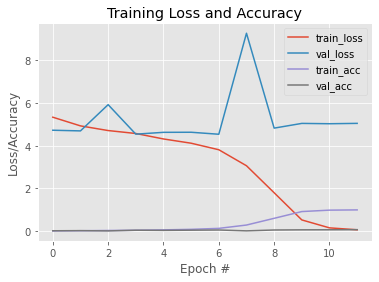

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 12), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 12), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 12), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 12), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusión:** Como podemos observar el modelo no es capaz de aprender correctamente y a la vez se intuye que se está produciendo overfitting.

In [ ]:
modelCustom_v1_0.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = modelCustom_v1_0.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 4s 164ms/step - loss: 5.3079 - accuracy: 0.0586
Loss 5.307880401611328, accuracy 0.05859375


## **Modelo 2 - From Scratch**
**Idea**: Mejorar todos los defectos del modelo 1. Para ello se han lanzado diferentes experimentos hasta llegar a un modelo óptimo.

**Objetivo**: El objetivo principal que se quiere buscar con el modelo 2 es el de reducción del overfitting. También, como objetivo secundario, se quiere conseguir que la red artificial aprenda a clasificar razas de perros con una mayor precisión.

**Listado** de las cosas que se van a probar:

1.   **Incrementar Dropout.**
2.   **Variar capas densas (tanto tamaño de filtros como número de capas).**
3.   **Incremetar Batchnormalization.**
4.   **Añadir Weight regularization.** 
5.   **Aumentado de datos**




**NOTA**: El modelo presentado en este punto es un modelo que se ha obtenido tras varios experimentos estudiando y analizando las curvas de aprendizaje.

In [ ]:
#BASE MODEL
# ESTE ES EL MODELO QUE HE GUARDADO COMO modelCustom_v4
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

x = Conv2D(32, (5, 5), padding="same", activation="relu")(inputs) 
x = Conv2D(32, (3, 3), padding="same", activation="relu")(x) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x) 
 
x = Conv2D(64, (5, 5), padding="same", activation="relu")(x) 
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x) 

#TOP MODEL
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(120, activation="softmax")(x)

modelCustom_v4_3 = Model(inputs=inputs, outputs=predictions)

In [ ]:
modelCustom_v4_3.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
name_experiment = 'modelCustom_v4_3'
epocas = 100
history = modelCustom_v4_3.fit_generator(datagen_v2.flow(X_train, y_train, batch_size = 32), 
                                    steps_per_epoch = len(X_train)/32, 
                                    epochs = epocas, 
                                    workers = 2,
                                    validation_data = datagen_v2.flow(X_val, y_val, batch_size = 32),
                                    callbacks=my_callbacks)

In [ ]:
#Guardar modelo
modelCustom_v4_3.save(BASE_FOLDER+"/"+name_experiment+".h5")

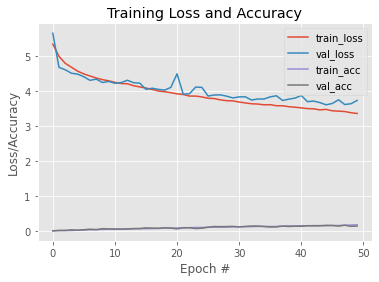

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusiones**: Tras varios experimentos retocando hiperparámetros se ha conseguido el objetivo principal, la reducción del overfitting.

**¿Cómo se ha conseguido?** El aumento del **Dropout**, **batchnormalization** (entre las capas densas), un número pequeño de filtros en las capdas densas y principalmente la incorporación de un generador de datos estable han conseguido obtener un buen modelo.


Pese a ello, el mejor modelo que se ha podido entrenar únicamente ha llegado a un accuracy en validación de 0.17% de acierto, lo que nos indica:

*   O bien que la red no tiene sufciente capacidad como para aprender características importantes de los datos.
*   O bien que el conjunto de datos no es suficientemente representativo como para afrontar el problema.

In [ ]:
modelCustom_v4_3.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = modelCustom_v4_3.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 2s 122ms/step - loss: 3.5875 - accuracy: 0.1465
Loss 3.587491989135742, accuracy 0.146484375


## **Modelo 3 - From Scratch**
**Idea**: Mejorar todos los defectos del modelo 2.

**Objetivo**: El objetivo principal que se quiere buscar con el modelo 3 es el de mejorar la precisión obtenida en el modelo 2. Recordemos que era 0.17% en validación.

**Listado** de las cosas que se van a probar:

1.   **Experimentar con má capas neuronales**
2.   **Añadir bloques residuales**


**NOTA**: Al igual que en el resto de modelos solo se muestra el mejor aunque se han realizado más experimentos.

In [ ]:
#BASE MODEL
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

x_shortcut = inputs
x = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x = Conv2D(32, (3, 3), padding="same", activation="relu")(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x_shortcut = Conv2D(32, (3, 3), padding="same")(x_shortcut)
x = tf.keras.layers.Add()([x, x_shortcut])
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x) 
x_shortcut = x

x_shortcut = x
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = Conv2D(64, (3, 3), padding="same")(x)
x_shortcut = Conv2D(64, (3, 3), padding="same")(x_shortcut)
x = tf.keras.layers.Add()([x, x_shortcut])
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x) 
x_shortcut = x

x_shortcut = x
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = Conv2D(128, (3, 3), padding="same")(x)
x_shortcut = Conv2D(128, (3, 3), padding="same")(x_shortcut)
x = tf.keras.layers.Add()([x, x_shortcut])
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x) 

#TOP MODEL
x = Flatten()(x)
x = Dense(256, activation="relu",
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01),
                bias_regularizer = l2(0.01))(x)
x = Dense(256, activation="relu",
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01),
                bias_regularizer = l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(120, activation="softmax")(x)

modelCustom_v6_residual = Model(inputs=inputs, outputs=predictions)

In [ ]:
modelCustom_v6_residual.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
name_experiment = 'modelCustom_v6_residual'
epocas = 30
history = modelCustom_v6_residual.fit_generator(datagen_v2.flow(X_train, y_train, batch_size = 32), 
                                    steps_per_epoch = len(X_train)/32, 
                                    epochs = epocas, 
                                    workers = 2,
                                    validation_data = datagen_v2.flow(X_val, y_val, batch_size = 32),
                                    callbacks=my_callbacks)

In [ ]:
modelCustom_v6_residual.save(BASE_FOLDER+"/"+name_experiment+".h5")

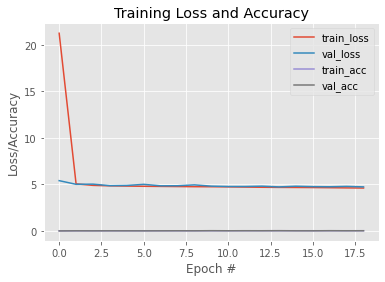

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 19), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 19), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 19), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 19), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusiones**: Los resultados obtenidos en el modelo 3 no son los esperados ya que la red no ha conseguido aprender características "importantes" y por lo tanto **el mejor modelo** que se obtiene con la estrategia 1 es el **modelo 2**.

In [ ]:
modelCustom_v6_residual.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = modelCustom_v6_residual.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 5s 230ms/step - loss: 4.6961 - accuracy: 0.0332
Loss 4.696143627166748, accuracy 0.033203125


# [ESTRATEGIA 2] **Transfer Learning & Fine Tunning**

### Tras examinar las diferentes arquitecturas preentrenadas de la librería keras hemos optado por seleccionar la red MobileNetv2 y la red InceptionV3.

# **TRANSFER LEARNING**
Dado que con los modelos creados desde 0 no hemos conseguido muy buenos resultado afrontaremos el problema inicialmente como un problema de *Transfer Learning* cargando los pesos de **Imagenet**. La idea que reside debajo de esta hipóteiss es que las **características** aprendidas para clasificar la base de datos de Imagenet pueden ser **muy parecidas** a las que podamos ser capaces de aprende *from scrach* (en las imágenes de Imagenet se encuentra un gran conjunto de animales).

## [MobileNetV2] Transfer Learning

### [MobileNetV2] **Modelo INICIAL** - Transfer Learning

**Idea**: Creamos un primer modelo inicial teniendo en cuenta todas las medidas de regularización utilizadas previamente en los modelos creados desde 0. Principalmente **Dropout**, **Batchnormalization** y **Aumentado de datos**.

**Objetivo**: Mejorar las métricas obtenidas con los modelos desde 0 sin obtener overfitting.

In [ ]:
base_model_mobilenetv2 = tf.keras.applications.mobilenet_v2.MobileNetV2(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
base_model_mobilenetv2.trainable = False
    
last = base_model_mobilenetv2.layers[-1].output
x = Flatten()(last)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Dense(120, activation="softmax")(x)

model_mobilenetv2_1 = tf.keras.Model(base_model_mobilenetv2.input, x) 

In [ ]:
model_mobilenetv2_1.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
epocas = 30
name_experiment = 'MobileNetV2 version 1.0'
history = model_mobilenetv2_1.fit(datagen_v1.flow(X_train, y_train, batch_size = 32), 
                                    steps_per_epoch = len(X_train)/32, 
                                    epochs = epocas, 
                                    workers = 2,
                                    validation_data = datagen_v1.flow(X_val, y_val, batch_size = 32),
                                    callbacks=my_callbacks)

In [ ]:
#Guardar modelo
model_mobilenetv2_1.save(BASE_FOLDER+name_experiment+".h5")

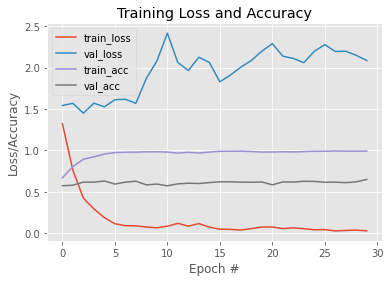

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epocas), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epocas), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epocas), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epocas), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusiones**: Tras los primeros resultados podemos sacar una conclusión principal:

1.   Se produce Overfitting.

Una de las medidas principales que se tomará es cambiar el Aumentado de datos y añadir una mayor regularización en las capas densas del TOP MODEL.


In [ ]:
model_mobilenetv2_1.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = model_mobilenetv2_1.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 5s 157ms/step - loss: 2.0915 - accuracy: 0.6602
Loss 2.0914766788482666, accuracy 0.66015625


### [MobileNetV2] **Modelo FINAL** - Transfer Learning

**Objetivo**: Minimizar lo máximo posible el Overfitting.
Listado de las cosas que se van a probar:

1.   **Incrementar Dropout.**
2.   **Variar capas densas (tanto tamaño de filtros como número de capas).**
3.   **Incremetar Batchnormalization.**
5.   **Cambiar el aumentado de datos**




**NOTA**: El modelo presentado en este punto es un modelo que se ha obtenido tras varios experimentos estudiando y analizando las curvas de aprendizaje.

In [ ]:
base_model_mobilenetv2 = tf.keras.applications.mobilenet_v2.MobileNetV2(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
base_model_mobilenetv2.trainable = False
    
last = base_model_mobilenetv2.layers[-1].output
x = GlobalAveragePooling2D()(last)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(120, activation="softmax")(x)

model_mobilenetv2_final = tf.keras.Model(base_model_mobilenetv2.input, x) 

In [ ]:
model_mobilenetv2_final.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
epocas = 30
name_experiment = 'MobileNetV2 version 3.4'
history = model_mobilenetv2_final.fit(datagen_v1.flow(X_train, y_train, batch_size = 32), 
                                    steps_per_epoch = len(X_train)/32, 
                                    epochs = epocas, 
                                    workers = 2,
                                    validation_data = datagen_v1.flow(X_val, y_val, batch_size = 32),
                                    callbacks=my_callbacks)

Epoch 1/30
279/279 [==============================] - 49s 161ms/step - loss: 4.5928 - accuracy: 0.0681 - val_loss: 2.9320 - val_accuracy: 0.3880
Epoch 2/30
279/279 [==============================] - 44s 156ms/step - loss: 3.0862 - accuracy: 0.2494 - val_loss: 1.9267 - val_accuracy: 0.5378
Epoch 3/30
279/279 [==============================] - 44s 156ms/step - loss: 2.4788 - accuracy: 0.3515 - val_loss: 1.5604 - val_accuracy: 0.5977
Epoch 4/30
279/279 [==============================] - 44s 157ms/step - loss: 2.1407 - accuracy: 0.4170 - val_loss: 1.4529 - val_accuracy: 0.5990
Epoch 5/30
279/279 [==============================] - 44s 156ms/step - loss: 1.9806 - accuracy: 0.4462 - val_loss: 1.3539 - val_accuracy: 0.6042
Epoch 6/30
279/279 [==============================] - 44s 156ms/step - loss: 1.8975 - accuracy: 0.4608 - val_loss: 1.2882 - val_accuracy: 0.6185
Epoch 7/30
279/279 [==============================] - 44s 156ms/step - loss: 1.7597 - accuracy: 0.4971 - val_loss: 1.2321 - val_ac

In [ ]:
#Guardar modelo
model_mobilenetv2_final.save(BASE_FOLDER+name_experiment+".h5")

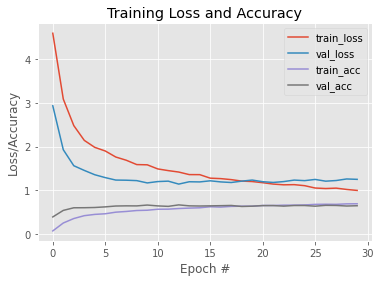

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epocas), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epocas), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epocas), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epocas), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusiones**: Tras varios experimentos se consigue el resultado esperado y se obtiene un algoritmo que no tiene practicamente Overfitting. A su vez, las gráficas extraídas del histórico del modelo son muy favorables y se ha conseguido reducir considerablemente el overfitting obteniendo un modelo que es capaz de generalizar correctamente.

**¿Cómo se ha reducido?** El aumento del **Dropout**, **batchnormalization** (entre las capas densas), un número pequeño de filtros en las capdas densas y principalmente la disminución del mapa de características/embedding gracias a utilizar **GlobalAveragePooling2D()** han conseguido obtener un modelo prometeder que tiene, viendo las gráficas, mayor capacidad de aprendizaje auqnue el entrenamiento se ha parado antes.

In [ ]:
model_mobilenetv2_final.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = model_mobilenetv2_final.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 3s 120ms/step - loss: 1.1512 - accuracy: 0.6777
Loss 1.1511931419372559, accuracy 0.677734375


## [InceptionV3] Transfer Learning

#### Seguimos los mismos pasos que con la red MobileNetV2 y experimentamos con la idea de obtener el mejor modelo posible.

#### En este caso, **por redundancia** de datos, tras varios experimentos **presentamos únicamente el mejor modelo** entrenado con la idea de compararlo con el mejor modelo de la MobileNetV2

**Objetivo:** Conseguir un modelo competente y que no tenga overfitting.

### [InceptionV3] Modelo **FINAL** - Transfer Learning
El mejor modelo que se ha llegado a entrenar con la red InceptionV3 tiene los mismos hiperparámetros que la red MobileNetV2 a excepción de la forma en la que reducimos el embedding. En este caso la mejor opción ha sido utilizar **GlobalMaxPooling2D()** en vez de GlobalAveragePooling2D. 

Parece que esta configuración favorece la convergencia y reduce considerablemente el overfiting en ambos modelos.

In [ ]:
base_model_inceptionV3 = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
base_model_inceptionV3.trainable = False
    
last = base_model_inceptionV3.layers[-1].output
x = GlobalMaxPooling2D()(last)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(120, activation="softmax")(x)

model_inceptionV3_final = tf.keras.Model(base_model_inceptionV3.input, x) 

In [ ]:
model_inceptionV3_final.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
epocas = 30
name_experiment = 'InceptionV3 version 2.2'
history = model_inceptionV3_final.fit(datagen_v1.flow(X_train, y_train, batch_size = 32), 
                                    steps_per_epoch = len(X_train)/32, 
                                    epochs = epocas, 
                                    workers = 2,
                                    validation_data = datagen_v1.flow(X_val, y_val, batch_size = 32),
                                    callbacks=my_callbacks)

In [ ]:
#Guardar modelo
model_inceptionV3_final.save(BASE_FOLDER+name_experiment+".h5")

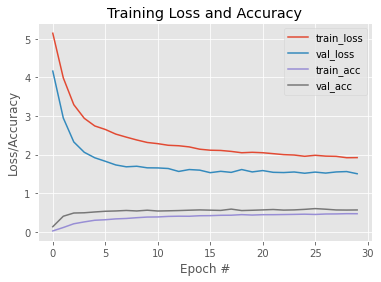

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epocas), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epocas), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epocas), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epocas), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusión:** Como podemos observar el modelo aprende correctamente y no se produce overfitting gracias a las medidas de regularización.

In [ ]:
model_inceptionV3_final.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = model_inceptionV3_final.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 5s 120ms/step - loss: 1.5520 - accuracy: 0.5820
Loss 1.552017331123352, accuracy 0.58203125


# **FINE TUNNING**
Con Transfer Learning hemos obtenido muy buenos resultados, mucho mejores que los obtenidos con los modelos desde 0.

La idea de este enfoque es **ir descongelando bloques convolucionales** desde el último hasta el primero para ver si somos capaces de mejorad los resultados obtenidos.

**¿Por qué descongelamos bloques desde el último?** El principal motivo de realizar así es porque en las últimas capas convolucionales se encuentras las **características más específicas** aprendidas por la red y en las primeras capas características más generales (bordes, líneas, esquinas, etc.). Por lo tanto podríamos pensar que no son muy apropiadas las últimas capas de la red si la tarea en cuestión no es muy similar a la que se realizó cuando se entrenó el modelo con otros datos (en este caso con la base de datos Imagenet).
Lo que hacemos aquí es justificar que vamos a coger el mejor modelo que hemos entrenado en la etapa de Transfer Learning. Además, para ayudar a la conversión vamos a cargar los pesos preentrenados ya en Tansfer Learning.

## [MobileNetV2] Fine Tunning



Tras estudiar la arquitectura se ha decidido ir descongelando las siguiente capas de la red correspondientes a los 16 bloques convolucionales que la componen:

In [ ]:
l = ['block_16_expand','block_15_expand','block_14_expand','block_13_expand','block_12_expand', 'block_11_expand', 'block_10_expand']

### [MobileNetV2] block_16_expand - Fine Tunning
Por no introducir código redundante se ha expuesto únicamente el entrenamiento del mejor modelo con Fine Tunning.

In [ ]:
base_model_mobilenetv2 = tf.keras.applications.mobilenet_v2.MobileNetV2(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
base_model_mobilenetv2.trainable = True

trainable = False
for layer in base_model_mobilenetv2.layers:
  # print(layer.name)
  if layer.name == l[0]:
    trainable = True
  layer.trainable = trainable
    
last = base_model_mobilenetv2.layers[-1].output
x = GlobalAveragePooling2D()(last)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(120, activation="softmax")(x)

model_mobilenetv2_block_16_expand = tf.keras.Model(base_model_mobilenetv2.input, x) 

In [ ]:
model_mobilenetv2_block_16_expand.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
epocas = 30
name_experiment = 'Mobilenetv2_block_16_expand'
history = model_mobilenetv2_block_16_expand.fit(datagen_v1.flow(X_train, y_train, batch_size = 32), 
                                    steps_per_epoch = len(X_train)/32, 
                                    epochs = epocas, 
                                    workers = 2,
                                    validation_data = datagen_v1.flow(X_val, y_val, batch_size = 32),
                                    callbacks=my_callbacks)

In [ ]:
#Guardar modelo
model_mobilenetv2_block_16_expand.save(BASE_FOLDER+name_experiment+".h5")

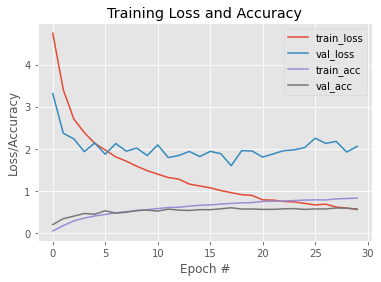

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epocas), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epocas), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epocas), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epocas), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusión:** Se han hecho pruebas hasta descongelar el bloque block_13_expand y en todos ellos el incremento del overfitting es mayor debido a perder las características aprendidas con la base de datos Imagenet. Se ha decidido exponer los resultados de la block_16_expand que son los que menos overfitting obtienen aunuqe el desempeño de la red es **peor que con Transfer Learning**.

In [ ]:
model_mobilenetv2_final_block5.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = model_mobilenetv2_final_block5.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 5s 158ms/step - loss: 2.0157 - accuracy: 0.6074
Loss 2.015728235244751, accuracy 0.607421875


## [InceptionV3] Fine Tunning
Seguimos el mismo proceso que con la MobileNetV2 y aplicamos Fine Tunning de manera ascendiente. Desbloqueando primero las últimas capacas que son las que contienen las características más específicas de los datos.

In [ ]:
l = ['mixed9','mixed8','mixed7','mixed6','mixed5', 'mixed4','mixed3','mixed2','mixed1','mixed0']

Seleccionamos las capacas Concatenate() llamadas mixed para desbloquear los bloques convolucionales completos. 

### [InceptionV3] mixed9 - Fine Tunning
Descongelamos el último bloque mixed

In [ ]:
base_model_inceptionV3 = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
base_model_inceptionV3.trainable = True

trainable = False
for layer in base_model_inceptionV3.layers:
  # print(layer.name)
  if layer.name == l[0]:
    trainable = True
  layer.trainable = trainable
    
last = base_model_inceptionV3.layers[-1].output
x = GlobalAveragePooling2D()(last)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(120, activation="softmax")(x)

model_inceptionV3_final_mixed9 = tf.keras.Model(base_model_inceptionV3.input, x) 

In [ ]:
name_experiment_transfer_learning = 'InceptionV3 version 2.2'
model_inceptionV3_final_mixed9.load_weights(BASE_FOLDER+name_experiment_transfer_learning+".h5")

In [ ]:
model_inceptionV3_final_mixed9.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
name_experiment = 'InceptionV3_mixed9'
epocas = 30
history = model_inceptionV3_final_mixed9.fit(datagen_v1.flow(X_train, y_train, batch_size = 32), 
                                    steps_per_epoch = len(X_train)/32, 
                                    epochs = epocas, 
                                    workers = 2,
                                    validation_data = datagen_v1.flow(X_val, y_val, batch_size = 32),
                                    callbacks=my_callbacks)

In [ ]:
#Guardar modelo
model_inceptionV3_final_mixed9.save(BASE_FOLDER+name_experiment+".h5")

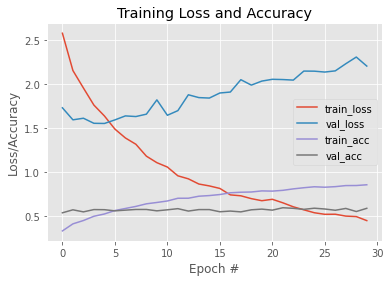

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epocas), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epocas), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epocas), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epocas), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusión:** Observamos que tras desbloquear el último bloque mixed la red no mejora los resultados obtenidos. Esto se puede deber a multitud de posibilidades aunque todo apunta a que son demasiados pocos datos para todos los pesos que se han desbloqueado y por lo tanto el algoritmo termina con un overfitting muy grande.

**Siguentes pasos:** Parece que al descongelar la última capa mixed ya estamos descongelando más capas de lo debido asi que cambiamos de estrategia y descongelamos capas entre la capa mixed9 y la última capa antes del top modelo

In [ ]:
model_inceptionV3_final_mixed9.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = model_inceptionV3_final_mixed9.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 4s 134ms/step - loss: 2.5850 - accuracy: 0.5352
Loss 2.5849835872650146, accuracy 0.53515625


### [InceptionV3] conv2d_93 - Fine Tunning
Dentro del último bloque mixed descongelamos los bloques que tiene intermedios. Para no ser redundates se mostrará únicamente los resultados del mejor modelo preentrenado haciendo Fine Tunning. Este se ha conseguido descongelando la capa **conv2d_93**

In [ ]:
l_mixed9 = ['conv2d_93 ', 'conv2d_92', 'conv2d_91']

In [ ]:
base_model_inceptionV3 = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
base_model_inceptionV3.trainable = True

trainable = False
for layer in base_model_inceptionV3.layers:
  # print(layer.name)
  if layer.name == l_mixed9[0]:
    trainable = True
  layer.trainable = trainable
    
last = base_model_inceptionV3.layers[-1].output
x = GlobalAveragePooling2D()(last)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(120, activation="softmax")(x)

model_inceptionV3_final_mixed9_conv2d_93 = tf.keras.Model(base_model_inceptionV3.input, x) 

In [ ]:
model_inceptionV3_final_mixed9_conv2d_93.compile(loss="categorical_crossentropy", 
                       optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                       metrics=["accuracy"])

In [ ]:
name_experiment = 'InceptionV3_mixed9_conv2d_93'
epocas = 50
history = model_inceptionV3_final_mixed9_conv2d_93.fit(datagen_v1.flow(X_train, y_train, batch_size = 32), 
                                    steps_per_epoch = len(X_train)/32, 
                                    epochs = epocas, 
                                    workers = 2,
                                    validation_data = datagen_v1.flow(X_val, y_val, batch_size = 32),
                                    callbacks=my_callbacks)

In [ ]:
#Guardar modelo
model_inceptionV3_final_mixed9_conv2d_93.save(BASE_FOLDER+name_experiment+".h5")

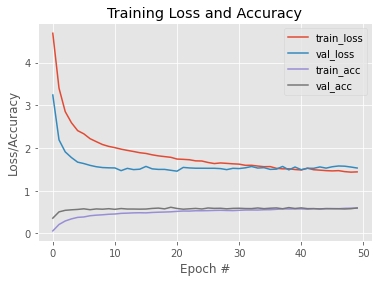

In [ ]:
#Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epocas), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epocas), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epocas), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epocas), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(BASE_FOLDER+'/'+name_experiment+'.png')
plt.show()

**Conclusiones:** Los resultados obtenidos son muy favorables y la curva de aprendizaje es bastante coherente con respecto a un entrenamiento bien ejecutado. Aunque como podemos observar no hay una mejora muy grande con respecto al modelo de Transfer Learning.

In [ ]:
model_inceptionV3_final_mixed9_conv2d_93.load_weights(BASE_FOLDER + name_experiment+".h5")
loss, accuracy = model_inceptionV3_final_mixed9_conv2d_93.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

16/16 [==============================] - 7s 161ms/step - loss: 1.5385 - accuracy: 0.6055
Loss 1.538527011871338, accuracy 0.60546875


# **Conclusiones Generales**

Se ha realizado un trabajo completo sobre la base de datos **Dog Breed Identification** desde el estudio de los datos hasta la parametrización de la arquitectura.

Se trata de un dataset complicado al tener un gran número de clases y a su vez descompensadas (hay más muestras de algunas razas que de otras) pero aún así los resultados obtenidos son muy favorables ya que se ha llegado a obtener una arquitectura que es capaz, dado el número reducido de muestras (10k), obtener unos resultados competentes sin practicamente overfitting. 
Este modelo ha sido el **MobileNetV2 version 3.4** con un accuracy en test de **67.6%** combinando Transfer Learning con medidas de regularización adecuadas (se partia de un modelo inicial con overfitting y que no pasaba del 6% de accuracy).



## Comparativa mejores modelos
Vamos a comparar los mejores modelos para tomar la decisión de cual ha sido el mejor de todos.

Nota: Se debe hacer hincapié en que los valores resultantes del conjunto de **TEST no se han tenido en cuenta** durante la parametrización de los modelos aunque se hayan ido mostrando. 

In [1]:
import pandas as pd
headers = ['', 'Modelo 2 - From Scratch', 
           '[MobileNetV2] Modelo FINAL - Transfer Learning', 
           '[InceptionV3] Modelo FINAL - Transfer Learning', 
           '[MobileNetV2] block_16_expand - Fine Tunning',
           '[InceptionV3] conv2d_93 - Fine Tunning']

Accuracy =  ['Accuracy','14.6%', '67.6%', '58.2%', '60.7%', '60.55%']
Loss =      ['Loss'    , '3.59', '1.29' , '1.55' , '2.02'  , '1.54']


my_data = [tuple(Accuracy), tuple(Loss)]
df = pd.DataFrame(data = my_data, columns=headers)
df.T

,0,1
,Accuracy,Loss
Modelo 2 - From Scratch,14.6%,3.59
[MobileNetV2] Modelo FINAL - Transfer Learning,67.6%,1.29
[InceptionV3] Modelo FINAL - Transfer Learning,58.2%,1.55
[MobileNetV2] block_16_expand - Fine Tunning,60.7%,2.02
[InceptionV3] conv2d_93 - Fine Tunning,60.55%,1.54




Dejando a un lado el mejor modelo podemos observar diferentes conclusiones tras la exposición de los mejores modelos entrenados.



*   Por un lado, se ha conseguido, con los modelos diseñados desde 0 (**from scratch**), reducir hasta un valor insignificante el overfitting aunque la contra de estos modelos ha sido la poca capacidad de generalización o de aprendizaje debido, principalmente, a la falta de datos de entrenamiento.


*   Por otro lado, los modelos a los que se les ha aplicado **Fine Tunning**, aunque tenía resultados relativamente competentes, ha sido muy complicado reducir el **overfitting**, seguramente debido a la especialización de características en las capas **descongeladas**.


*   Por último, como se puede observar en la tabla, los modelos que **mejor desempeño** han tenido (rendimiento/precisión) han sido los modelo a los que se les ha aplicado **Transfer Learning**, los cuales conservaban las caracterísicas intactas extraídas por la base de datos Imagenet y han sido capaces de aprender correctamente. Aunque ya se ha mencionado previamente el mejor modelo que se ha llegado a obtener priorizando un correcto aprendizaje (sin overfitting) ha llegado a obtener un accuracy de **67.6%**.


## Siguientes Pasos

Con una priemra etapa cerrada de entrenamiento hay una serie de medidas que se pueden tomar para mejorar los resultados obtenidos:



1.   Dado que el mejor enfoque ha sido aplicar Transfer Learning se podría probar con el resto de **arquitecturas preentrenadas** de keras.

2.   Al tratarse de un conjunto de datos **desbalanceado** se podrían aplicar medidas de regularización sobre las muestras. Por ejemplo utilizar el parámetro de entrenamiento **class_weight**.

3.   Aplicar un mejor **aumentado de datos** dejando intáctas las características principales de los datos.

4.   Utilizar otras medidas de preentrenamiento para la red. Por ejemplo, entrenar un autoencoder  que aprenda codificaciones eficientes sobre las razas de perros.



